# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [5]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

### Questão 1

In [9]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


In [14]:
# Sua análise da parte 1 começa aqui.
#dataframe.describe()
#np.percentile(dataframe.normal, 25)

q1_norm = np.percentile(dataframe.normal, 25)
q2_norm = np.percentile(dataframe.normal, 50)
q3_norm = np.percentile(dataframe.normal, 75)
q1_binom = np.percentile(dataframe.binomial, 25)
q2_binom = np.percentile(dataframe.binomial, 50)
q3_binom = np.percentile(dataframe.binomial, 75)
(round(q1_norm - q1_binom, 3), round(q2_norm - q2_binom, 3), round(q3_norm - q3_binom, 3))

(0.31, -0.01, -0.316)

In [12]:
(q1_norm - q1_binom, q2_norm - q2_binom, q3_norm - q3_binom)

(0.3096378799715893, -0.010379903171511273, -0.315676448541339)

In [24]:
q1_norm = np.percentile(dataframe.normal, 25)
print(q1_norm)
print(dataframe.normal.quantile(q=0.25))

17.30963787997159
17.30963787997159


### Questão 2

In [104]:
x = round(np.mean(dataframe.normal), 0)
s = round(np.std(dataframe.normal), 0)
print("x = ", x)
print("s = ", s)
print("intervalo", [x-s, x+s])
print("intervalo 2", [x-2*s,x+2*s], "\nintervalo 3",  [x-3*s,x+3*s])

x =  20.0
s =  4.0
intervalo [16.0, 24.0]
intervalo 2 [12.0, 28.0] 
intervalo 3 [8.0, 32.0]


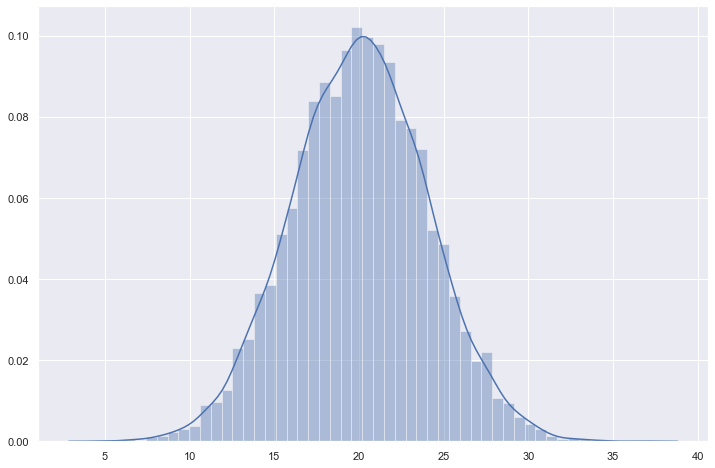

In [88]:
norm = sct.norm.rvs(loc=20, scale=4, size=10000) # loc é a média, scale é o desvio padrão. X ~ N(x, s).

sns.distplot(norm);

In [45]:
(norm.mean(), norm.var())

(19.030049569210835, 16.51709657388822)

In [46]:
round(sct.norm.cdf(15, loc=19, scale=4), 3)

0.159

In [47]:
round(sct.norm.cdf(24, loc=19, scale=4), 3)

0.894

In [89]:
#P(15 <= x <= 24) == F(24) - F(15) == F(intervalo)
round(sct.norm.cdf(24, loc=x, scale=s), 3)-round(sct.norm.cdf(15, loc=x, scale=s), 3)

0.735

In [97]:
round(sct.norm.cdf(24, loc=20, scale=4), 3)-round(sct.norm.cdf(15, loc=20, scale=4), 3)

0.735

In [94]:
round(sct.norm.cdf(24, loc=20.0, scale=4.0), 3)-round(sct.norm.cdf(15, loc=20.0, scale=4.0), 3)

0.735

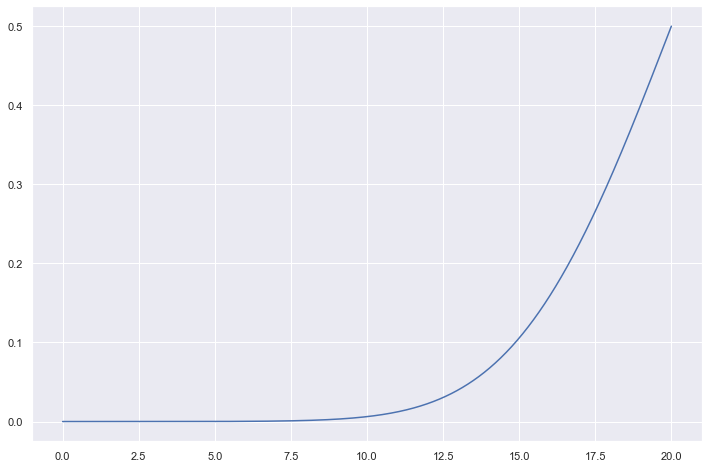

In [106]:
x = np.linspace(0, 20, num=1000)

f = lambda x: sct.norm.cdf(x, loc=20, scale=4)

cdf = f(x)

sns.lineplot(x, cdf);

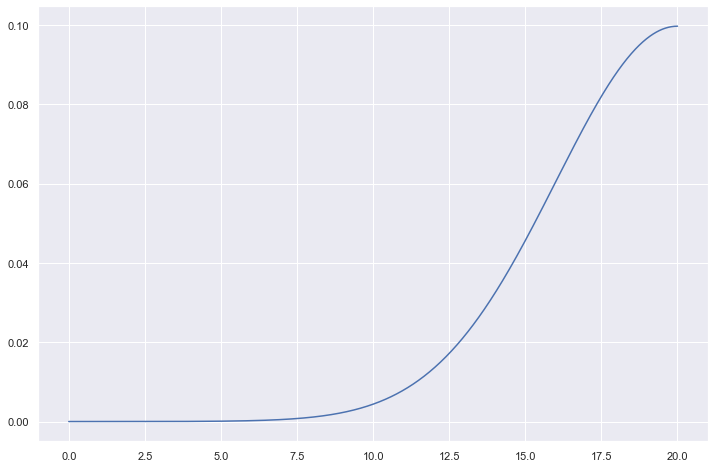

In [122]:
x = np.linspace(0, 20, num=1000)

f = lambda x: sct.norm.pdf(x, loc=20, scale=4)

pdf = f(x)

sns.lineplot(x, pdf);


In [70]:
sct.norm.cdf(19, loc=19, scale=4)

0.5

In [76]:
round(sct.norm.cdf(11, loc=19, scale=4), 3)

0.023

In [77]:
round(sct.norm.cdf(28, loc=19, scale=4), 3)

0.988

In [98]:
round(sct.norm.cdf(28, loc=x, scale=s), 3)-round(sct.norm.cdf(11, loc=x, scale=s), 3)

0.965

In [99]:
round(sct.norm.cdf(32, loc=x, scale=s), 3)-round(sct.norm.cdf(7, loc=x, scale=s), 3)

0.998

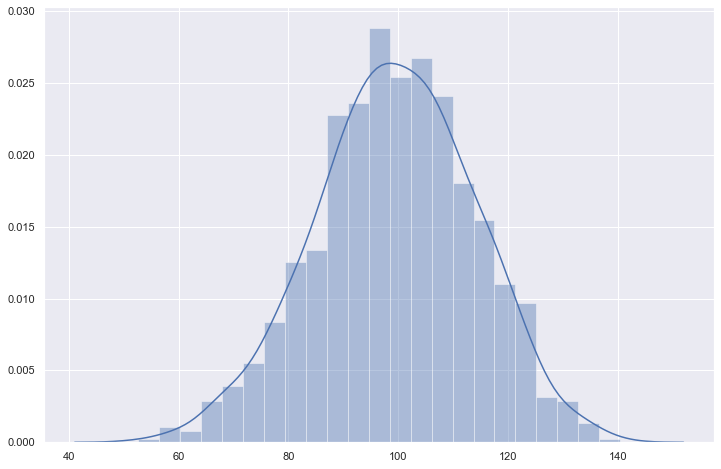

In [159]:
norm = sct.norm.rvs(loc=100, scale=15, size=1000) # loc é a média, scale é o desvio padrão. X ~ N(x, s).

sns.distplot(norm);

In [177]:
1-sct.norm.cdf(124, loc=100, scale=15)-sct.norm.cdf(120, loc=100, scale=15)

-0.8539894885745741

### Questão 3

In [107]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


In [124]:
dataframe.shape

(10000, 2)

In [121]:
#media
#variancia
#diferenca

m_binom = round(np.mean(dataframe.binomial), 3)
v_binom = round(np.var(dataframe.binomial), 3)
m_norm = round(np.mean(dataframe.normal), 3)
v_norm = round(np.var(dataframe.normal), 3)
print(m_binom)
#(m_binom - m_norm, v_binom - v_norm)
print(round(m_binom-m_norm, 3))
print(round(v_binom-v_norm, 3))
print(m_binom-m_norm, v_binom-v_norm)
(round(m_binom-m_norm, 3), round(v_binom-v_norm, 3))

20.097
0.106
0.221
0.10600000000000165 0.22099999999999653


(0.106, 0.221)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q1_norm = np.percentile(dataframe.normal, 25)
    q2_norm = np.percentile(dataframe.normal, 50)
    q3_norm = np.percentile(dataframe.normal, 75)
    q1_binom = np.percentile(dataframe.binomial, 25)
    q2_binom = np.percentile(dataframe.binomial, 50)
    q3_binom = np.percentile(dataframe.binomial, 75)
    return (round(q1_norm - q1_binom, 3), round(q2_norm - q2_binom, 3), round(q3_norm - q3_binom, 3))
    pass

Para refletir:

* Você esperava valores dessa magnitude?
*sim, pelos valores listados no describe*
* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?
*ainda nao*

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [6]:
def q2():
    # Retorne aqui o resultado da questão 2.
    #intervalo = [15.977, 24.005]
    #P(15 <= x <= 24) == F(24) - F(15) == F(intervalo)
    x = round(np.mean(dataframe.normal), 0)
    s = round(np.std(dataframe.normal), 0)
    return round(sct.norm.cdf(24, loc=x, scale=s), 3)-round(sct.norm.cdf(15, loc=x, scale=s), 3)
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico? *acho q nao, achei muio estranho os valores, se fiz certo achei o desvio padrao mto alto*
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$. *nao sei dizer se melhorou ou piorou, so sei q mdeu um resultado maior, masi porximo de 1*

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [7]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_binom = round(np.mean(dataframe.binomial), 3)
    m_norm = round(np.mean(dataframe.normal), 3)
    v_binom = round(np.var(dataframe.binomial), 3)
    v_norm = round(np.var(dataframe.normal), 3)
    return (round(m_binom-m_norm, 3), round(v_binom-v_norm, 3))
    pass

Para refletir:

* Você esperava valore dessa magnitude? *nao, pelo menos nao pra variancia*
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`? *nao entedi essa ainda*

## Parte 2

### _Setup_ da parte 2

In [6]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [7]:
# Sua análise da parte 2 começa aqui.
stars.head(5)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [8]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [205]:
#filtrando table
star_mean_profile_table = pd.DataFrame(stars['mean_profile'][stars['target'] == 0])
star_mean_profile_table_test = star_mean_profile_table.head(20)

In [204]:
from sklearn import preprocessing

In [210]:
normalized_test=(star_mean_profile_table_test-star_mean_profile_table_test.min())/(star_mean_profile_table_test.max()-star_mean_profile_table_test.min())

In [223]:
normalized_test.mean()

mean_profile    0.513692
dtype: float64

In [224]:
normalized_test

,mean_profile
0,0.258310
1,0.267828
2,0.900132
3,0.000000
4,0.090789
5,0.576512
6,0.780788
7,0.347196
8,0.347342
9,1.000000


In [214]:
re_escala = preprocessing.StandardScaler().fit(normalized_test)
res_padronizacao = re_escala.transform(normalized_test) 
star_mean_profile_table_test_padronizada = pd.DataFrame(res_padronizacao)
star_mean_profile_table_test_padronizada.columns = ['z_value'] #renomeando a coluna pq no padrao fica 0
star_mean_profile_table_test_padronizada.mean()
#qtd_de_um_e_menos = coluna_purchase_padronizada['z_value'].between(-1, 1, inclusive=True).value_counts().iloc[0]

z_value    1.165734e-16
dtype: float64

In [215]:
star_mean_profile_table_test_padronizada.var()

z_value    1.052632
dtype: float64

In [194]:
#x = media
#s = desvio padrao
x = star_mean_profile_table_test['mean_profile'].mean()
s = star_mean_profile_table_test['mean_profile'].std()


In [195]:
star_mean_profile_table_test

,mean_profile
0,102.507812
1,103.015625
2,136.750000
3,88.726562
4,93.570312
5,119.484375
6,130.382812
7,107.250000
8,107.257812
9,142.078125


In [98]:
normalized_star_mean_profile_table_test=(star_mean_profile_table_test-star_mean_profile_table_test.min())/(star_mean_profile_table_test.max()-star_mean_profile_table_test.min())

In [196]:
star_mean_profile_table_test['false_pulsar_mean_profile_standardized'] = 0

C:\Users\mxapi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
star_mean_profile_table_test['mean_profile'].iloc[2]
#star_mean_profile_table_test.loc[0,'z'] = 2
#star_mean_profile_table_test.loc[3, 'z']

136.75

In [198]:
star_mean_profile_table_test

,mean_profile,z
0,102.507812,0
1,103.015625,0
2,136.750000,0
3,88.726562,0
4,93.570312,0
5,119.484375,0
6,130.382812,0
7,107.250000,0
8,107.257812,0
9,142.078125,0


In [199]:
lista=[]

In [200]:
#padronizando
#z_i = (x_i + X) / s
    
for i in star_mean_profile_table_test.index:
    x_i = star_mean_profile_table_test.mean_profile.loc[[i]]
    z_i = ((x_i+x)/s)
    #lista.append(z_i)
    #z.append(z_i)
    #print(zi)
    #SALVANDO NA COLUNA z
    star_mean_profile_table_test.z.loc[[i]] = z_i
#print(lista)


C:\Users\mxapi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mxapi\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [201]:
star_mean_profile_table_test

,mean_profile,z
0,102.507812,13.154418
1,103.015625,13.184970
2,136.750000,15.214584
3,88.726562,12.325275
4,93.570312,12.616697
5,119.484375,14.175805
6,130.382812,14.831505
7,107.250000,13.439729
8,107.257812,13.440199
9,142.078125,15.535148


In [202]:
star_mean_profile_table_test.mean()

mean_profile    116.132812
z                13.974160
dtype: float64

In [203]:
star_mean_profile_table_test.var()

mean_profile    276.260292
z                 1.000000
dtype: float64

### Resolucao Q4

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [10]:
def q4():
    # Retorne aqui o resultado da questão 4.
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [11]:
def q5():
    # Retorne aqui o resultado da questão 5.
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.